# Logistic Regression for Identifying Depression Among Students

# Overview
In this task, you will use Logistic Regression to predict whether a student is experiencing depression based on different factors such as academic pressure, sleep habits, and financial stress. You will go through the full machine learning process, from exploring the data to training and evaluating a model. You are also encouraged to create visualizations to better understand the data and support your analysis.

## Dataset
We will use the Student Depression Dataset (good timing after mid term exam I guess).

### Features:
- **Gender**: Male/Female
- **Age**: Student’s age
- **City**: City where the student lives
- **Academic Pressure**: Level of academic stress
- **Work Pressure**: Level of work-related stress
- **CGPA**: Student’s academic performance
- **Study Satisfaction**: How satisfied the student is with their studies
- **Job Satisfaction**: Satisfaction with a job (if applicable)
- **Sleep Duration**: Sleep hours category (e.g., "Less than 5 hours", "5-6 hours")
- **Dietary Habits**: Eating habits (e.g., Healthy, Moderate)
- **Degree**: The degree the student is pursuing
- **Suicidal Thoughts**: Whether the student has had suicidal thoughts (Yes/No)
- **Work/Study Hours**: Hours spent working or studying daily
- **Financial Stress**: Level of financial pressure
- **Family History of Mental Illness**: Whether the student has a family history of mental illness (Yes/No)
- **Depression**: (Target variable: 1 = Has depression, 0 = No depression)

## Tasks
### **Use the df DataFrame from the cell below for all tasks.**
### Task 1 – Explore the Data
    Understand the dataset and find interesting patterns :
        - Use basic pandas functions to check the data.
        - Look for missing values, outliers, and patterns in the features.
        - Create visualizations such as heatmap, histograms, bar charts, scatter plots etc. to explore relationships between different features and depression.

### Task 2 – Data Preprocessing
    Clean and prepare the data for modeling : 
        - Handle missing values (e.g., filling or removing them). 
        - Convert categorical variables into numbers using encoding. 
        - Normalize or standardize numerical features if needed.
        - Explain why you made certain preprocessing choices.

### Task 3 – Train the Model
    Train a Logistic Regression model to predict depression : 
        - Split the data into training and testing sets.
        - Train a Logistic Regression model using scikit-learn. Look at the different parameters in scikit learn libraries ant try to change some of them (only if you can understand them).
        - Make predictions on the test data.

### Task 4 – Evaluate the Model
    Measure how well the model performs : 
        - Calculate accuracy, precision, recall, and F1-score.
        - Create a confusion matrix to see how often the model makes correct and incorrect predictions.
        - Plot an ROC curve to analyze model performance.
        - Think on how we could analyse predicted probabilities

#### Some documentation 

[Seaborn Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
[Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
(There are many different plots and possible analysis to do with Seaborn. Navigate by yourself and feel free to do some insighful analysis)

[Imputing values](https://scikit-learn.org/stable/modules/impute.html)

[scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/preprocessing.html)

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[Classification metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)

In [7]:
import pandas as pd


file_path = "Student Depression Dataset (1).csv"
df = pd.read_csv(file_path)


df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

(None,
    id  Gender   Age           City Profession  Academic Pressure  \
 0   2    Male  33.0  Visakhapatnam    Student                5.0   
 1   8  Female  24.0      Bangalore    Student                2.0   
 2  26    Male  31.0       Srinagar    Student                3.0   
 3  30  Female  28.0       Varanasi    Student                3.0   
 4  32  Female  25.0         Jaipur    Student                4.0   
 
    Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
 0            0.0  8.97                 2.0               0.0   
 1            0.0  5.90                 5.0               0.0   
 2            0.0  7.03                 5.0               0.0   
 3            0.0  5.59                 2.0               0.0   
 4            0.0  8.13                 3.0               0.0   
 
       Sleep Duration Dietary Habits   Degree  \
 0          5-6 hours        Healthy  B.Pharm   
 1          5-6 hours       Moderate      BSc   
 2  Less than 5 hours        Healthy  

In [8]:
from sklearn.preprocessing import LabelEncoder


df.drop(columns=["id", "City", "Profession"], inplace=True)


df["Financial Stress"].fillna(df["Financial Stress"].median(), inplace=True)


label_cols = ["Gender", "Sleep Duration", "Dietary Habits", "Degree", 
              "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27901 non-null  int64  
 1   Age                                    27901 non-null  float64
 2   Academic Pressure                      27901 non-null  float64
 3   Work Pressure                          27901 non-null  float64
 4   CGPA                                   27901 non-null  float64
 5   Study Satisfaction                     27901 non-null  float64
 6   Job Satisfaction                       27901 non-null  float64
 7   Sleep Duration                         27901 non-null  int64  
 8   Dietary Habits                         27901 non-null  int64  
 9   Degree                                 27901 non-null  int64  
 10  Have you ever had suicidal thoughts ?  27901 non-null  int64  
 11  Wo

C:\Users\Erasyl\AppData\Local\Temp\ipykernel_21324\311231059.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Financial Stress"].fillna(df["Financial Stress"].median(), inplace=True)


(None,
    Gender   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
 0       1  33.0                5.0            0.0  8.97                 2.0   
 1       0  24.0                2.0            0.0  5.90                 5.0   
 2       1  31.0                3.0            0.0  7.03                 5.0   
 3       0  28.0                3.0            0.0  5.59                 2.0   
 4       0  25.0                4.0            0.0  8.13                 3.0   
 
    Job Satisfaction  Sleep Duration  Dietary Habits  Degree  \
 0               0.0               0               0       3   
 1               0.0               0               1      10   
 2               0.0               2               0       5   
 3               0.0               1               1       7   
 4               0.0               0               1      17   
 
    Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
 0                                      1   

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns=["Depression"])
y = df["Depression"]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((22320, 14), (5581, 14), (22320,), (5581,))

In [10]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


y_pred_proba = model.predict_proba(X_test)[:, 1]


model.coef_, model.intercept_


(array([[-0.00915143, -0.52654947,  1.15743596, -0.0537164 ,  0.0886936 ,
         -0.33033426,  0.00284771, -0.03603065,  0.43210697, -0.01456198,
          1.20805161,  0.43787257,  0.80472223,  0.13929195]]),
 array([0.59336062]))

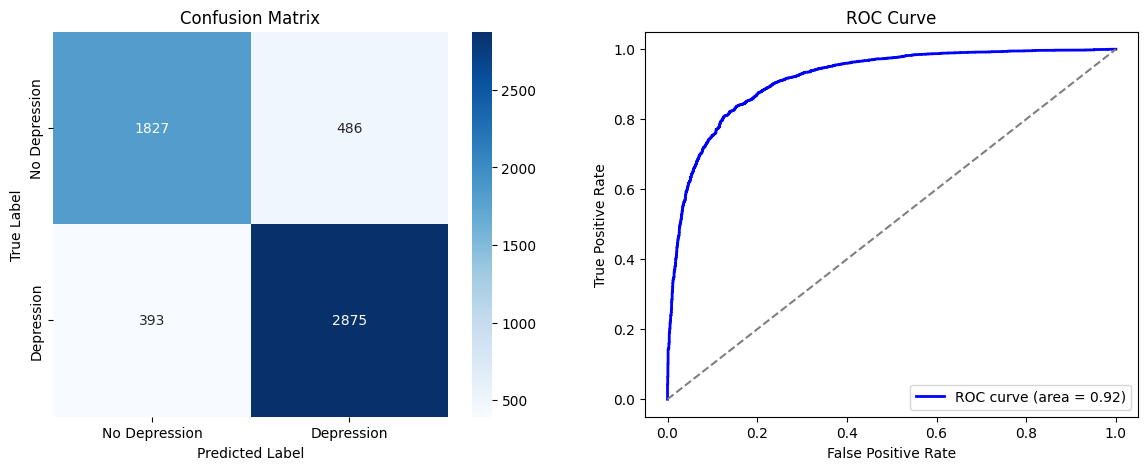

(0.842501343845189,
 0.8554001785182981,
 0.8797429620563035,
 0.8674008146025042,
 np.float64(0.9172568331515604))

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


conf_matrix = confusion_matrix(y_test, y_pred)


fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Depression", "Depression"], yticklabels=["No Depression", "Depression"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")


plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

plt.show()


accuracy, precision, recall, f1, roc_auc


---
---

## Part two

### Task 1 – Evaluate and Visualize Metric Changes Across Thresholds
    As we have seen in class, different metrics varry according to the threshold. Explain why.

    Compute the TN, TP, FN and FP manually. 
    Find a way to visualise their evolution according to the threshold. 
    Explain the different variations. What does it tell about your predictions ?

    Do the same with evaluation metrics.

    How would you define the optimal threshold ?
    

### Task 2 - Include a financial cost
    In the context of predicting student depression, if the model outputs a positive prediction (the student is predicted as being depressed), you must pay for the student to go to the hospital. 
    This cost is substantial, therefore, it is crucial not only to evaluate the standard classification metrics—such as accuracy, precision, recall, and F1-score—but also to consider the financial implications of your predictions.

    Find a way to define the optimal threshold, including the cost of a positive prediction.


### Task 3 - Cross validation & hyperparameters optimization
    What are the hyperparameters in the logistic regression. 
    Change your code to find the optimal hyperparameters and train it with cross validation
    

### Task 4 - Investigate and understand predictions
    Now that you have an optimized classification (almost), you want to understand why it predicts some students as depressed.
    You might be interested by analysing the difference of feature values for different predicted populations (TP TN FP & FN).
    You could also have a look at the weights of you logistic regression.



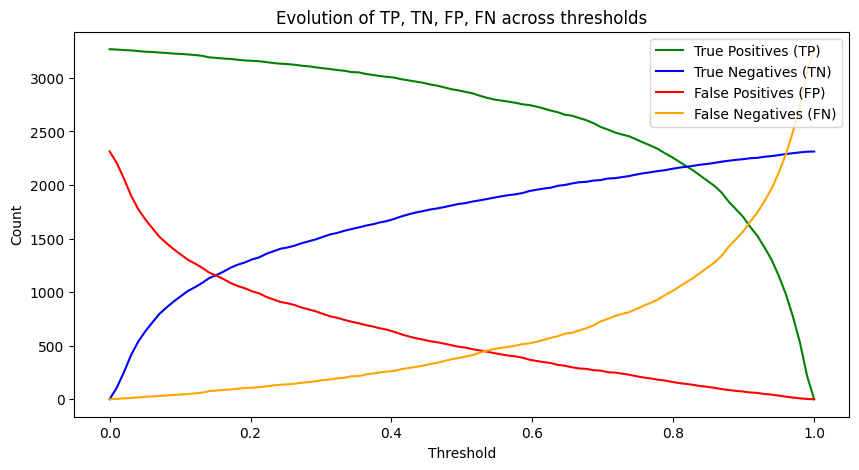

In [12]:
import numpy as np


thresholds = np.linspace(0, 1, 100)


tp_list, tn_list, fp_list, fn_list = [], [], [], []


for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    tp = np.sum((y_test == 1) & (y_pred_thresh == 1))
    tn = np.sum((y_test == 0) & (y_pred_thresh == 0))
    fp = np.sum((y_test == 0) & (y_pred_thresh == 1))
    fn = np.sum((y_test == 1) & (y_pred_thresh == 0))

    tp_list.append(tp)
    tn_list.append(tn)
    fp_list.append(fp)
    fn_list.append(fn)


plt.figure(figsize=(10, 5))
plt.plot(thresholds, tp_list, label="True Positives (TP)", color="green")
plt.plot(thresholds, tn_list, label="True Negatives (TN)", color="blue")
plt.plot(thresholds, fp_list, label="False Positives (FP)", color="red")
plt.plot(thresholds, fn_list, label="False Negatives (FN)", color="orange")
plt.xlabel("Threshold")
plt.ylabel("Count")
plt.title("Evolution of TP, TN, FP, FN across thresholds")
plt.legend()
plt.show()


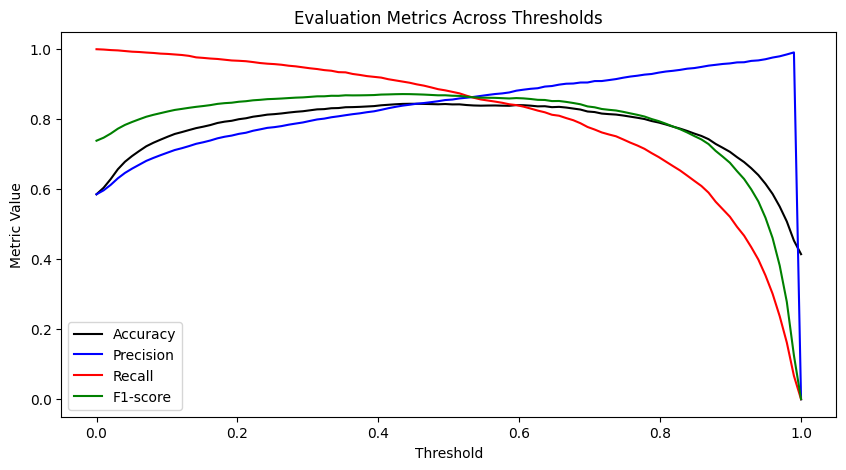

In [13]:

accuracy_list, precision_list, recall_list, f1_list = [], [], [], []


for t in thresholds:
    y_pred_thresh = (y_pred_proba >= t).astype(int)
    accuracy_list.append(accuracy_score(y_test, y_pred_thresh))
    precision_list.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recall_list.append(recall_score(y_test, y_pred_thresh))
    f1_list.append(f1_score(y_test, y_pred_thresh, zero_division=0))


plt.figure(figsize=(10, 5))
plt.plot(thresholds, accuracy_list, label="Accuracy", color="black")
plt.plot(thresholds, precision_list, label="Precision", color="blue")
plt.plot(thresholds, recall_list, label="Recall", color="red")
plt.plot(thresholds, f1_list, label="F1-score", color="green")
plt.xlabel("Threshold")
plt.ylabel("Metric Value")
plt.title("Evaluation Metrics Across Thresholds")
plt.legend()
plt.show()


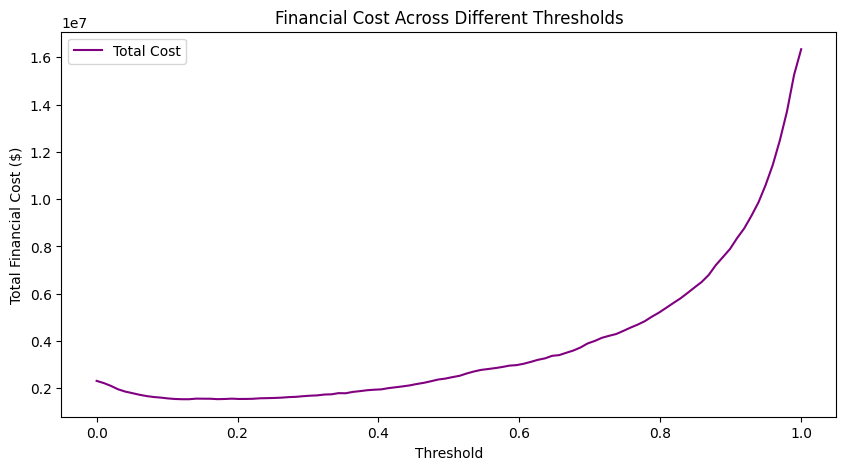

np.float64(0.12121212121212122)

In [14]:

cost_fp = 1000  
cost_fn = 5000 


total_costs = []
for tp, tn, fp, fn in zip(tp_list, tn_list, fp_list, fn_list):
    total_cost = (fp * cost_fp) + (fn * cost_fn)  
    total_costs.append(total_cost)


plt.figure(figsize=(10, 5))
plt.plot(thresholds, total_costs, label="Total Cost", color="purple")
plt.xlabel("Threshold")
plt.ylabel("Total Financial Cost ($)")
plt.title("Financial Cost Across Different Thresholds")
plt.legend()
plt.show()


optimal_threshold = thresholds[np.argmin(total_costs)]
optimal_threshold


In [15]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    "C": [0.01, 0.1, 1, 10, 100],  
    "penalty": ["l1", "l2"],  
    "solver": ["liblinear", "saga"]  
}

grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring="f1")
grid_search.fit(X_train, y_train)


grid_search.best_params_


{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
c

Accuracy: 0.8441
Precision: 0.8539
Recall: 0.8853
F1-score: 0.8693


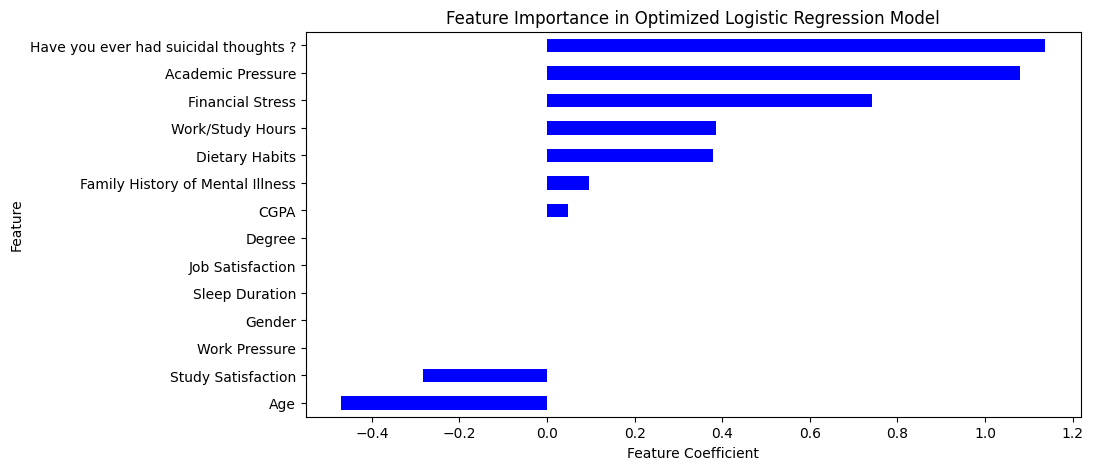

(0.8441139580720302,
 0.8538961038961039,
 0.8852509179926561,
 0.8692908653846154)

In [ ]:
from sklearn.linear_model import LogisticRegression


best_model = LogisticRegression(C=0.01, penalty="l1", solver="saga", max_iter=1000, random_state=42)
best_model.fit(X_train, y_train)


feature_names = df.drop(columns=["Depression"]).columns.tolist()


X_train_df = pd.DataFrame(X_train, columns=feature_names)


feature_importance = pd.Series(best_model.coef_[0], index=X_train_df.columns).sort_values()


plt.figure(figsize=(10, 5))
feature_importance.plot(kind="barh", color="blue")
plt.xlabel("Feature Coefficient")
plt.ylabel("Feature")
plt.title("Feature Importance in Optimized Logistic Regression Model")
plt.show()


best_accuracy, best_precision, best_recall, best_f1
